In [2]:
from src.data.loading import loading, sample
from src.data.cleaning import cleaning
from src.data.feature_engineering import dropping_constant_features
from src.data.splitting import train_val_test_split
from src.data.preprocessing import initial_preprocessing


In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Outline: 
# split data 
# cleaning and scaling first, imputation 
# drop quasi constant and constant features to reduce feature space 
# drop features that causes data leakage 
# correlation analysis on train data 

In [5]:
filepath = '/Users/thananpornsethjinda/Desktop/credit-risk-modeling/data/accepted_2007_to_2018Q4.csv'

df = loading(file_path=filepath)

cleaned_df = cleaning(df=df)

sampled_cleaned = sample(cleaned_df)

X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(sampled_cleaned)

X_train, X_val, X_test = initial_preprocessing(X_train=X_train, X_val=X_val, X_test=X_test)

X_train, X_val, X_test = dropping_constant_features(X_train=X_train, X_val=X_val, X_test=X_test)

/Users/thananpornsethjinda/Desktop/credit-risk-modeling/src/data/loading.py:10: DtypeWarning: Columns (0: id, 1: desc, 2: next_pymnt_d, 3: verification_status_joint, 4: sec_app_earliest_cr_line, 5: hardship_type, 6: hardship_reason, 7: hardship_status, 8: hardship_start_date, 9: hardship_end_date, 10: payment_plan_start_date, 11: hardship_loan_status, 12: debt_settlement_flag_date, 13: settlement_status, 14: settlement_date) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(file_path)


Data successfully read in 19.58694291114807 seconds!
Starting data cleaning
Grouping target variable to binary targets (Charged Off) and (Fully Paid) ...
Dropping loan status null values
A total of 45 were dropped; with the columns being ['member_id', 'desc', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'mths_since_rcnt_il', 'il_util', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',

<Axes: >

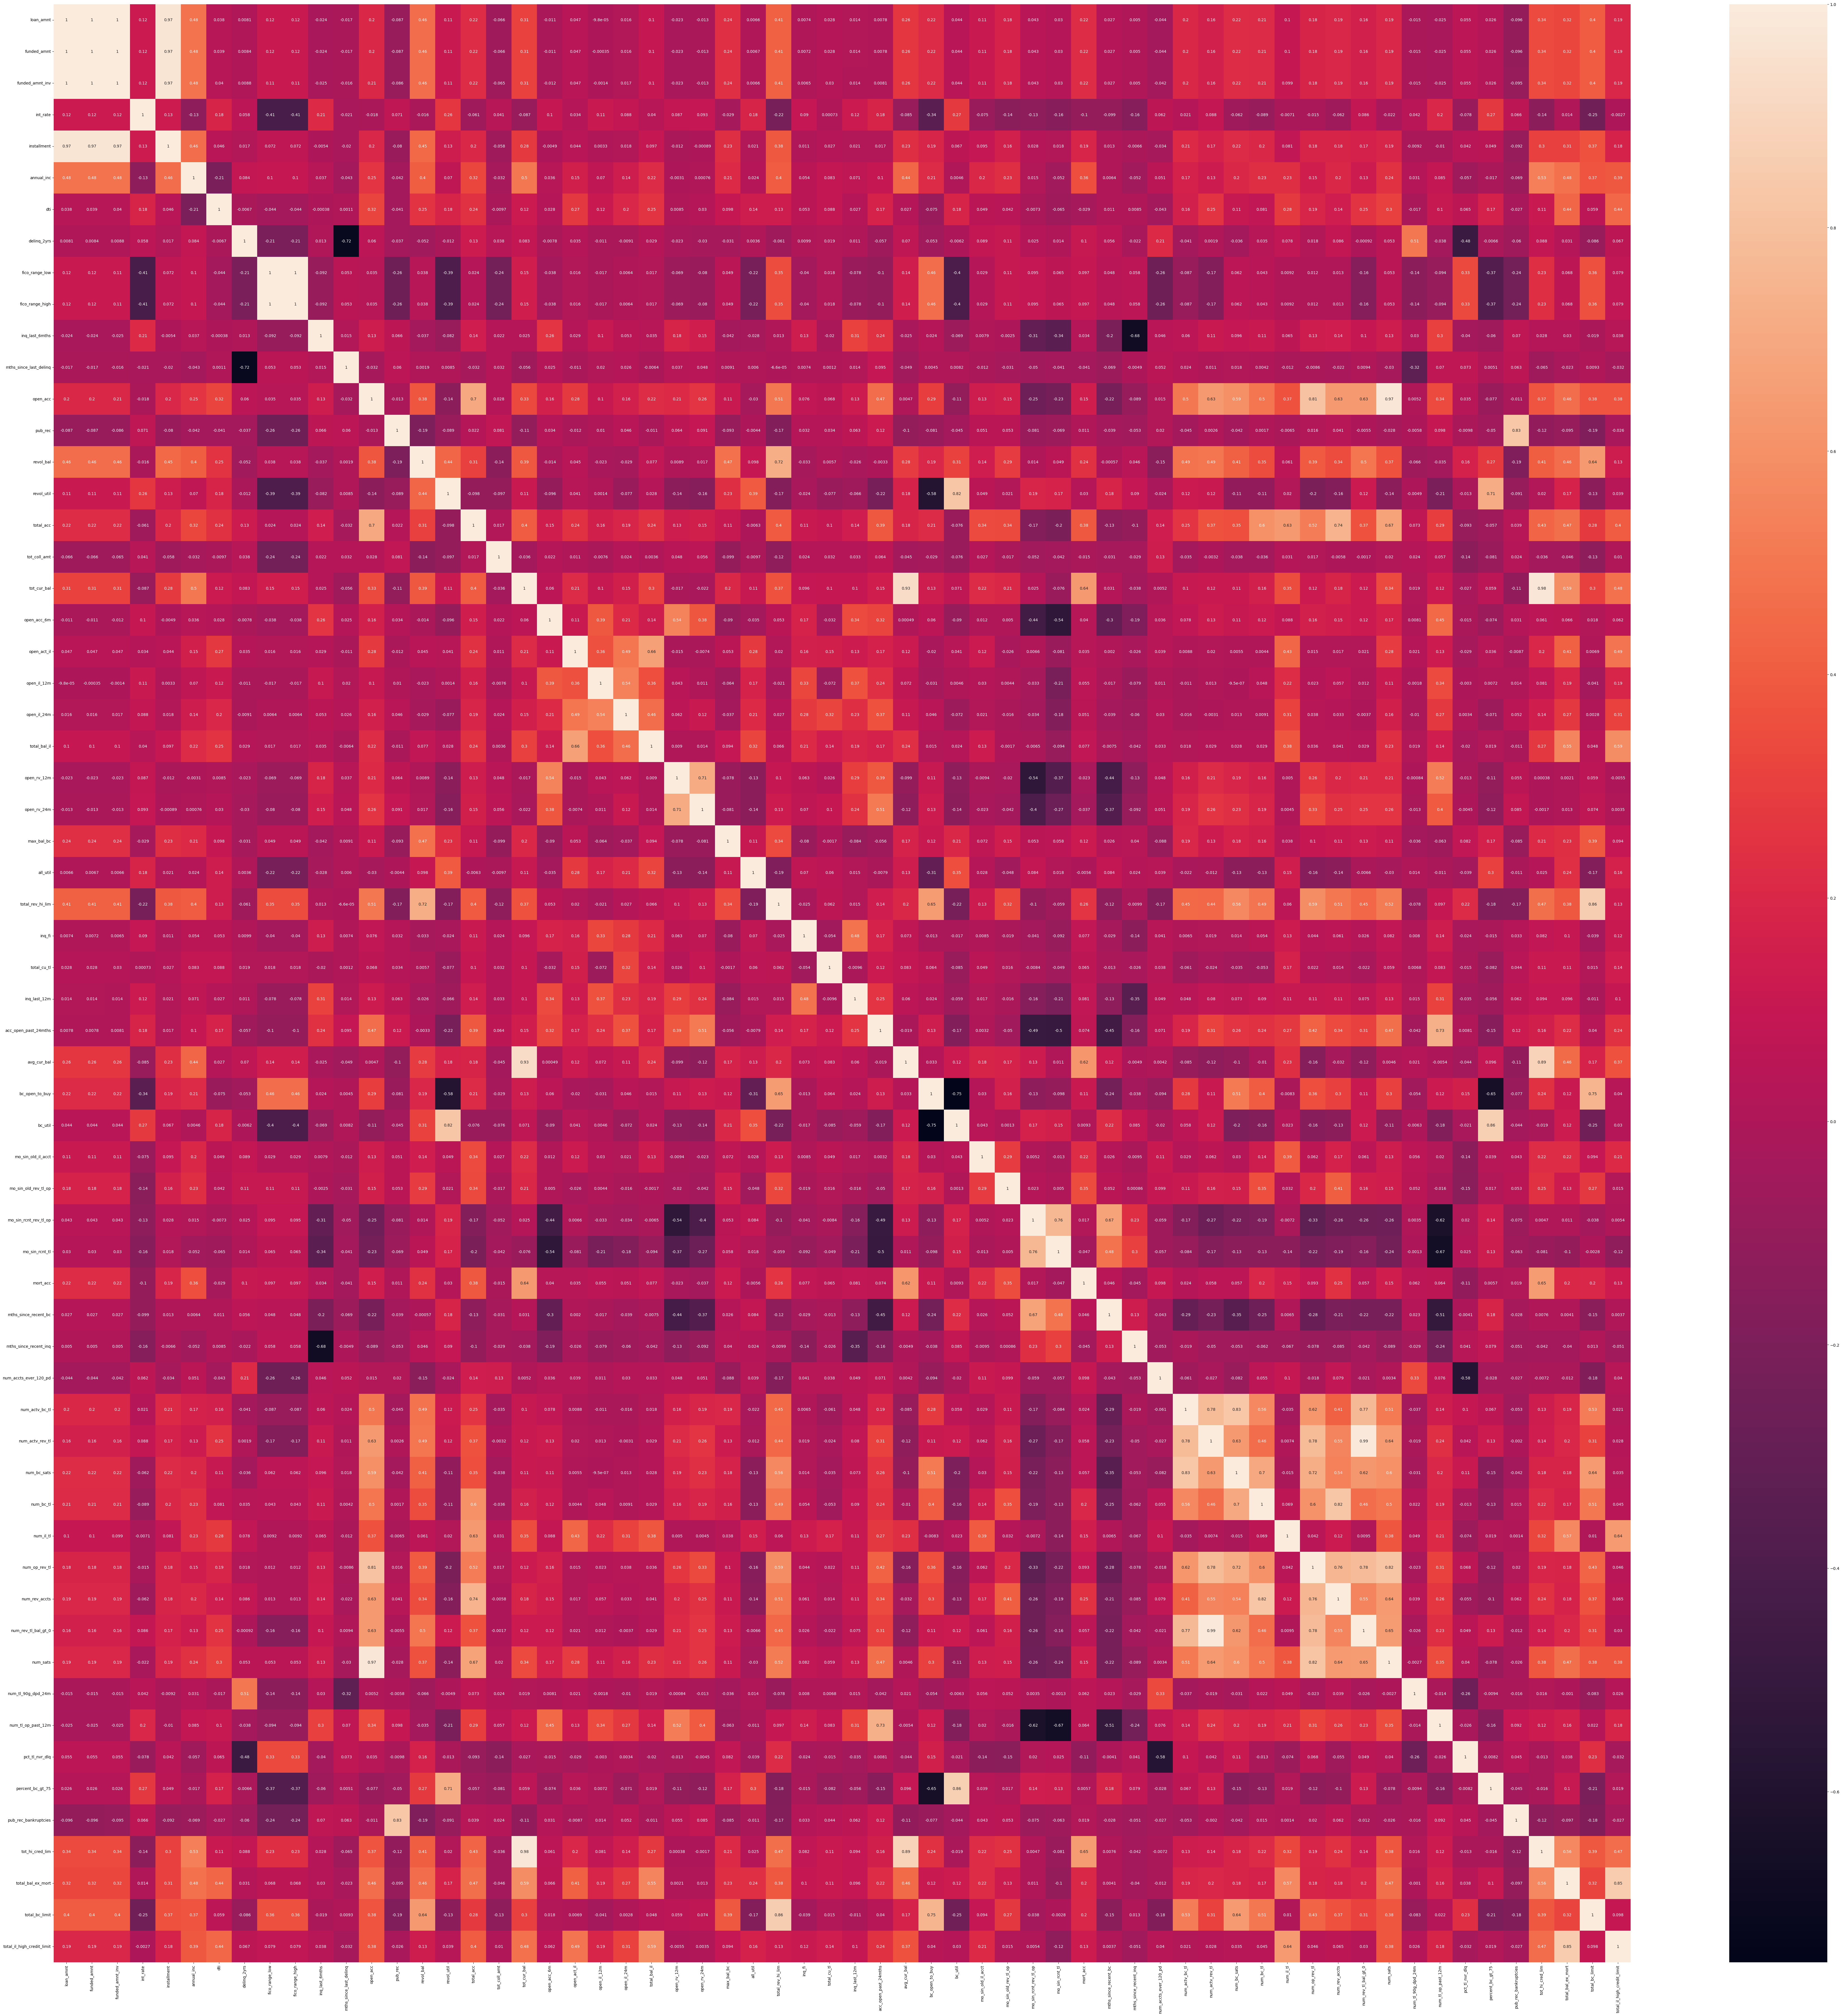

In [6]:
numerical_cleaned = X_train.select_dtypes(include=['float64'])
corr_max = numerical_cleaned.corr(method="spearman")
plt.figure(figsize=(90, 90))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_max, annot=True)

In [7]:
feature_correlation_table = corr_max.abs().unstack()

# select highly correlated 
feature_correlation_table = feature_correlation_table[feature_correlation_table > 0.8]

# remove self correlations 
feature_correlation_table = feature_correlation_table[feature_correlation_table < 1]

feature_correlation_table = pd.DataFrame(feature_correlation_table).reset_index()

feature_correlation_table.columns = ['feature1', 'feature2', 'corr']

feature_correlation_table

,feature1,feature2,corr
0,loan_amnt,funded_amnt,0.999588
1,loan_amnt,funded_amnt_inv,0.998237
2,loan_amnt,installment,0.969118
3,funded_amnt,loan_amnt,0.999588
4,funded_amnt,funded_amnt_inv,0.998799
5,funded_amnt,installment,0.969774
6,funded_amnt_inv,loan_amnt,0.998237
7,funded_amnt_inv,funded_amnt,0.998799
8,funded_amnt_inv,installment,0.968417
9,installment,loan_amnt,0.969118


In [8]:
grouped_feature_list = []
correlated_groups = []

for feature in feature_correlation_table['feature1'].unique(): 

    if feature not in grouped_feature_list: 

        correlated_block = feature_correlation_table.loc[feature_correlation_table['feature1'] == feature]

        grouped_feature_list = grouped_feature_list + list(correlated_block['feature2'].unique()) + [feature]

        correlated_groups.append(correlated_block)
        
print(f"Found {len(correlated_groups)} correlated groups")

Found 11 correlated groups


In [10]:
from sklearn.ensemble import RandomForestClassifier

features_to_drop = []

for group in correlated_groups: 
    
    print("=="*20)
    print(f"Group:{group}")
    features = np.concatenate((group['feature1'].unique(), group['feature2'].unique()))
    print()
    print(features)
    print()

    rf = RandomForestClassifier(n_estimators=10, random_state=42)

    rf.fit(X_train[features], y_train)

    importance = pd.concat(
        [pd.Series(features),
        pd.Series(rf.feature_importances_)], axis=1)
    importance.columns = ["feature","importance"]
    df = importance.sort_values(by="importance", ascending=False)
    print(df)
    df = df.reset_index().drop('index', axis=1)
    features_to_drop.extend(list(df['feature'][1:]))
    print("=="*20)
    print()

Group:    feature1         feature2      corr
0  loan_amnt      funded_amnt  0.999588
1  loan_amnt  funded_amnt_inv  0.998237
2  loan_amnt      installment  0.969118

['loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'installment']

           feature  importance
3      installment    0.694763
2  funded_amnt_inv    0.134401
1      funded_amnt    0.089185
0        loan_amnt    0.081651

Group:    feature1       feature2      corr
12  open_acc  num_op_rev_tl  0.808441
13  open_acc       num_sats  0.974804

['open_acc' 'num_op_rev_tl' 'num_sats']

         feature  importance
1  num_op_rev_tl    0.498606
0       open_acc    0.254504
2       num_sats    0.246890

Group:   feature1              feature2      corr
14  pub_rec  pub_rec_bankruptcies  0.833184

['pub_rec' 'pub_rec_bankruptcies']

                feature  importance
0               pub_rec    0.646236
1  pub_rec_bankruptcies    0.353764

Group:      feature1 feature2      corr
15  revol_util  bc_util  0.824904

['revol_util' 'bc_util

In [ ]:
# Analysis: Weighing between feature importance and theoretical importance 

